# Importing data

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 
Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import string

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data frame
df = pd.read_csv('m_train.csv')

In [3]:
#display the data set
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


# Data Analysis

In [4]:
#checking for null values in the data
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [5]:
#checking the datatypes for variables
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

<AxesSubplot:>

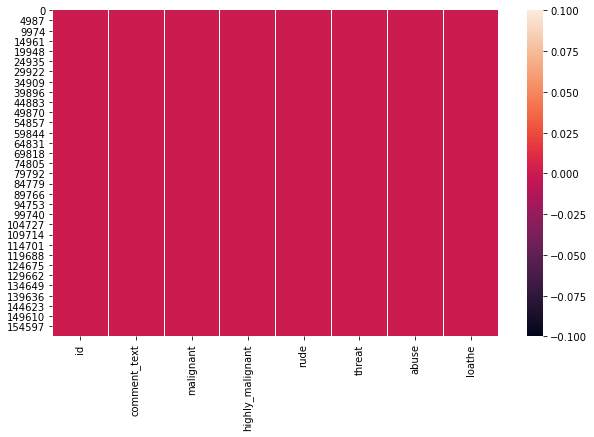

In [6]:
#making heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [7]:
#checking ratio of normal and bad comments
labels = df.columns[2:]

In [8]:
#counting the non-zero variables in the row coz they shows Malignant Comments
malignant_comments = len(df[df[labels].any(axis=1)])
print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df),2)}%)")

Total Malignant Comments: 16225 (10.17%)


In [9]:
#counting the zeros variables in the row coz they shows normal Comments
normal_comments = len(df)-malignant_comments
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df),2)}%)")

Total Normal Comments: 143346 (89.83%)


so we can clearly see the data is inbalanced

# Data Cleaning

In [10]:
#because the variable 'id' has no use we drop this column
df.drop(columns=['id'],inplace=True)

In [11]:
#checking the numbers of rows in te dataframe
num_rows= len(df)
print(num_rows)

159571


In [12]:
# display the comment of index 1
df['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [13]:
# display the comment of index 2
df['comment_text'][2]

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [14]:
#converting comment text to lowercase
df['comment_text'] = df.comment_text.str.lower()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


In [15]:
# removing the extra unneccessory characters from the comments
import nltk
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [16]:
# making the data frame easy to understandable language
alphas = lambda x: re.sub('w*\d\w*',' ',x)
lower = lambda x: re.sub( re.escape(string.punctuation),' ',x.lower())
remove_n = lambda x: re.sub('\n',' ', x)
remove_non = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)

In [17]:
# removing the nan and unnecessory words in the comment section
df['comment_text']=df['comment_text'].map(alphas).map(lower).map(remove_n).map(remove_non)

In [18]:
#stemming the words
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize

In [19]:
# display the comment of index 0 after customisation
df['comment_text'][0]

"explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now. . . . "

# EDA

<AxesSubplot:xlabel='malignant', ylabel='count'>

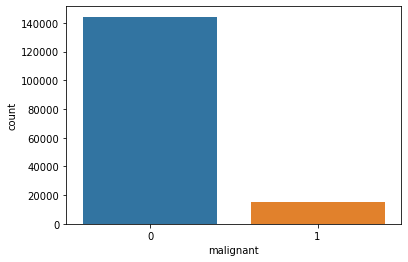

In [20]:
# display the data distribution of columns
sns.countplot(df['malignant'])

The number of malignant comments are very low as compare to normal comments. Here the blue bar represents no and 1 represents yes that tha comment is malignant or not.

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

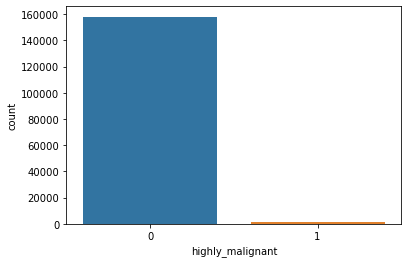

In [21]:
# display the data distribution of columns
sns.countplot(df['highly_malignant'])

The number of highly malignant comments are very low as compare to normal comments. Here the blue bar represents no and 1 represents yes that tha comment is malignant or not.

<AxesSubplot:xlabel='rude', ylabel='count'>

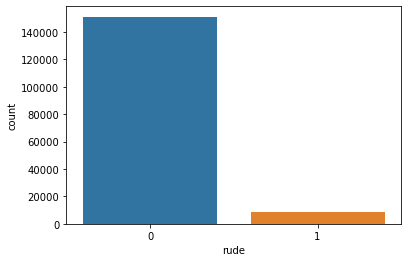

In [22]:
# display the data distribution of columns
sns.countplot(df['rude'])

The number of rude comments are very low as compare to normal comments. Here the blue bar represents no and 1 represents yes that tha comment is rude or not.

<AxesSubplot:xlabel='threat', ylabel='count'>

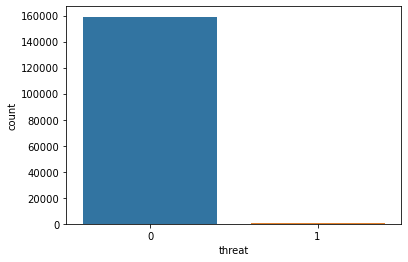

In [23]:
# display the data distribution of columns
sns.countplot(df['threat'])

The number of threat comments are very low as compare to normal comments. Here the blue bar represents no and 1 represents yes that tha comment is threat or not.

<AxesSubplot:xlabel='abuse', ylabel='count'>

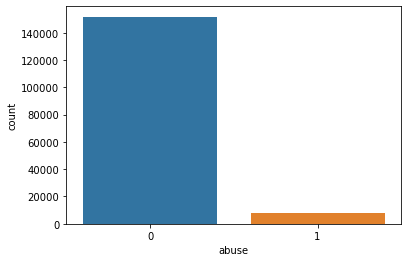

In [24]:
# display the data distribution of columns
sns.countplot(df['abuse'])

The number of abusive comments are very low as compare to normal comments. Here the blue bar represents no and 1 represents yes that the comment is abusive or not.

<AxesSubplot:xlabel='loathe', ylabel='count'>

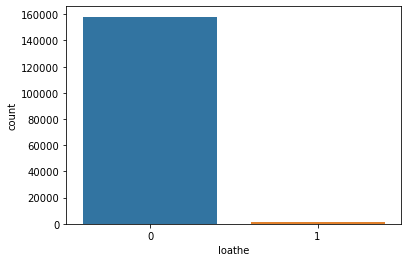

In [25]:
# display the data distribution of columns
sns.countplot(df['loathe'])

The number of loathe comments are very low as compare to normal comments. Here the blue bar represents no and 1 represents yes that the comment is loathe or not.

In [26]:
#display all the columns
df.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [27]:
#checking correlation between the variables
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


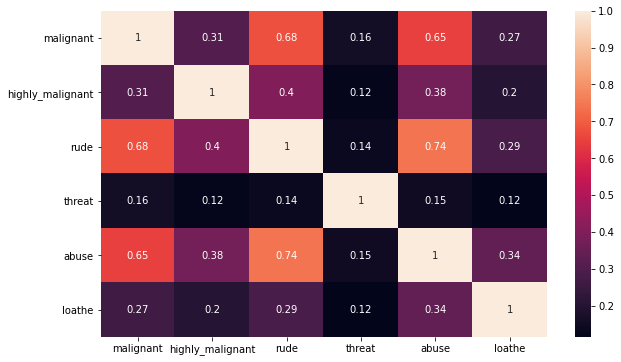

In [28]:
#checking correlation between the variables by making heatmap
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(),annot=True)
plt.show()

variables are not much correlated with each other

# now we create the word cloud

In [29]:
#importing the usefull libraries for making wordcloud
import wordcloud
from PIL import Image
from wordcloud import wordcloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from wordcloud import WordCloud

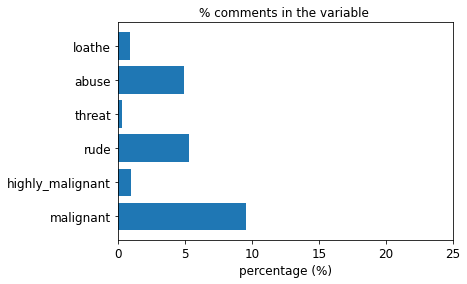

In [30]:
#creat a bar graph for all the coluns
sum_malig = df['malignant'].sum()/num_rows*100
sum_highml= df['highly_malignant'].sum()/num_rows*100
sum_rude=df['rude'].sum()/num_rows*100
sum_threat=df['threat'].sum()/num_rows*100
sum_abuse=df['abuse'].sum()/num_rows*100
sum_loathe=df['loathe'].sum()/num_rows*100
ind= np.arange(6)
ax= plt.barh(ind,[sum_malig, sum_highml, sum_rude, sum_threat, sum_abuse, sum_loathe])

plt.xlabel("percentage (%)",size=12)
plt.xticks(np.arange(0,30,5),size=12)
plt.title('% comments in the variable ',size=12)
plt.yticks(ind,('malignant','highly_malignant','rude','threat','abuse','loathe'),size=12);

We can see we have maximum numbers of malignant comments than rude than abusive very fer percentage comments of highly malignant, loathe and threat.

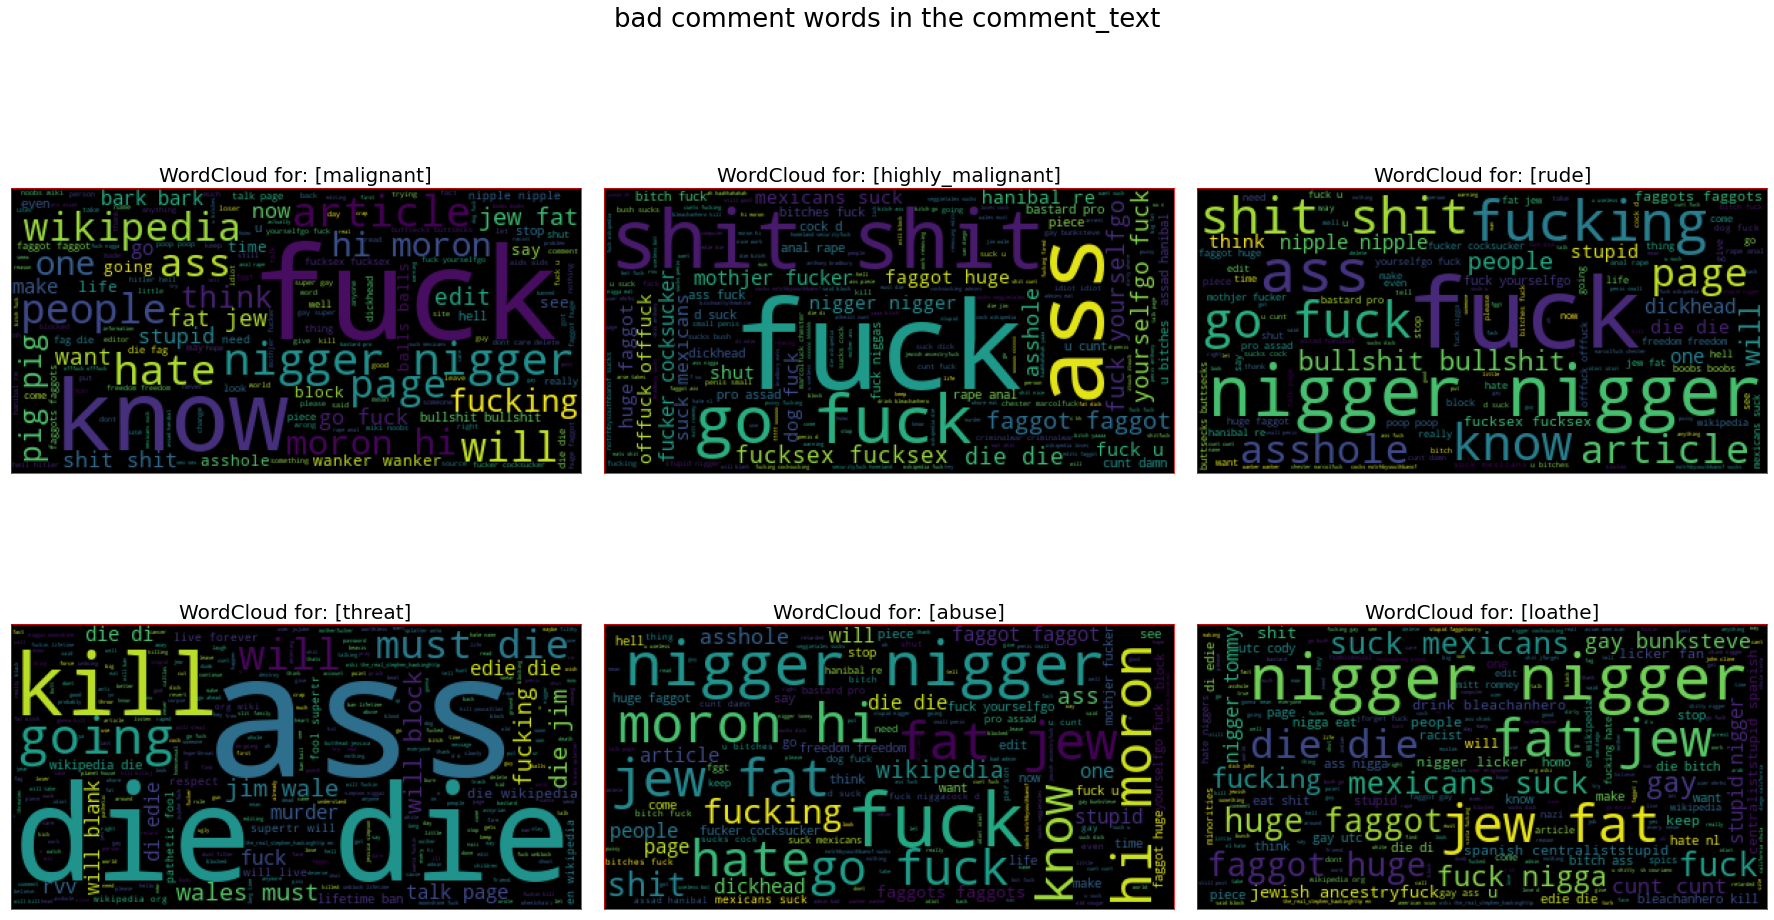

In [31]:
# display the bad words in the commnents by using word cloud
cols = 3
rows = len(labels)//cols
if len(labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(25,15))

p=1
for i in labels:
    wc = WordCloud(background_color="black",max_words=500).generate(' '.join(df.comment_text[df[i]==1]))
    bad_comments = fig.add_subplot(rows,cols,p)
    bad_comments.imshow(wc)
    bad_comments.set_title(f"WordCloud for: [{i}]",fontsize=20)
    for j in bad_comments.spines.values():
        j.set_edgecolor('r')
       
    bad_comments.set_xticks([])
    bad_comments.set_yticks([])
    p += 1

fig.suptitle("bad comment words in the comment_text",fontsize=26)
fig.tight_layout(pad=2)
plt.show()

now we can see the mostly used words in the malignant categories are includes fuck, fucking, nigger, stupid etc.

now we can see the mostly used words in the highly malignant categories are includes fuck, ass, shit, fucksex etc.

now we can see the mostly used words in the rude categories are includes nigger, bullshit, dickhead etc.

now we can see the mostly used words in the threat categories are includes ass, die, kill etc.

now we can see the mostly used words in the abuse categories are includes nigger, moron, go fuck, jew etc.

now we can see the mostly used words in the loathe categories are includes jew, fat, nigger, nigga etc

# Importing test data

In [32]:
#importing the test data on which we apply the results
df_test = pd.read_csv('m_test.csv')

In [33]:
#display the test dataframe
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [34]:
#checking for null values in the test data 
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [35]:
#because the variable 'id' has no use we drop this column
df_test.drop(columns=['id'],inplace=True)

# Pre Processing

In [36]:
#now converting the comments into the array using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['comment_text'])

In [37]:
#splitting the data
target_data = df[labels]

df['bad'] =df[labels].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [38]:
#splitting the data
from sklearn.model_selection import train_test_split
x = features
y=df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=.25)

In [39]:
from sklearn.metrics import accuracy_score,f1_score,roc_curve,roc_auc_score,auc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,lr_pred))
print('test_accuracy: ',accuracy_score(y_test,lr_pred_test))
print(confusion_matrix(y_test,lr_pred_test))
print(classification_report(y_test,lr_pred_test))

train_accuracy:  0.9599759354267284
test_accuracy:  0.9564083924498032
[[35694   170]
 [ 1569  2460]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     35864
           1       0.94      0.61      0.74      4029

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [41]:
#checking cross validation score for logistic regression
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lr,x,y,cv=5)
print('cross validation score is :', cvs.mean())

cross validation score is : 0.9561135774468144


# Random forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_train)
rfc_pred_test = rfc.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,rfc_pred))
print('test_accuracy: ',accuracy_score(y_test,rfc_pred_test))
print(confusion_matrix(y_test,rfc_pred_test))
print(classification_report(y_test,rfc_pred_test))

train_accuracy:  0.8984441584919534
test_accuracy:  0.8993808437570501
[[35864     0]
 [ 4014    15]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35864
           1       1.00      0.00      0.01      4029

    accuracy                           0.90     39893
   macro avg       0.95      0.50      0.48     39893
weighted avg       0.91      0.90      0.85     39893



In [43]:
#checking cross validation score with random forest classifier
cvs = cross_val_score(rfc,x,y,cv=5)
print('cross validation score is :', cvs.mean())

cross validation score is : 0.8988287337824351


# Decision tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_train)
dtc_pred_test = dtc.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,dtc_pred))
print('test_accuracy: ',accuracy_score(y_test,dtc_pred_test))
print(confusion_matrix(y_test,dtc_pred_test))
print(classification_report(y_test,dtc_pred_test))

train_accuracy:  0.998821838600244
test_accuracy:  0.9431729877422104
[[34786  1078]
 [ 1189  2840]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35864
           1       0.72      0.70      0.71      4029

    accuracy                           0.94     39893
   macro avg       0.85      0.84      0.84     39893
weighted avg       0.94      0.94      0.94     39893



In [45]:
#checking cross validation score with decision tree classifier
cvs = cross_val_score(dtc,x,y,cv=5)
print('cross validation score is :', cvs.mean())

cross validation score is : 0.941555798787182


# Ada Boost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_train)
abc_pred_test = abc.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,abc_pred))
print('test_accuracy: ',accuracy_score(y_test,abc_pred_test))
print(confusion_matrix(y_test,abc_pred_test))
print(classification_report(y_test,abc_pred_test))

train_accuracy:  0.9458463543842645
test_accuracy:  0.9458050284511067
[[35528   336]
 [ 1826  2203]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35864
           1       0.87      0.55      0.67      4029

    accuracy                           0.95     39893
   macro avg       0.91      0.77      0.82     39893
weighted avg       0.94      0.95      0.94     39893



In [47]:
#checking cross validation score with ada boost classifier
cvs = cross_val_score(abc,x,y,cv=5)
print('cross validation score is :', cvs.mean())

cross validation score is : 0.945616686573193


decision tree classifier is best fit for the malignant comment classification

Decision Tree: ROC AUC Score =0.837


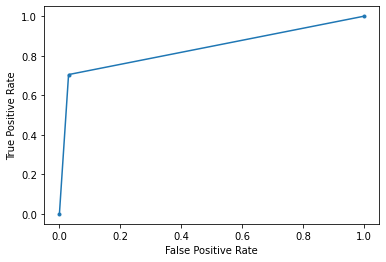

In [48]:
dtc_auc = roc_auc_score(y_test, dtc_pred_test)
print('Decision Tree: ROC AUC Score =%.3f' % (dtc_auc))
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_pred_test)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [49]:
# saving the model
import joblib
joblib.dump(dtc,'malignant comment classifier.pkl')

['malignant comment classifier.pkl']